<a href="https://colab.research.google.com/github/Nasty-24/Road_Accident_Severity_Model/blob/main/Road_Accident_Severity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving the model


In [ ]:
# Create a simulated dataset
np.random.seed(42)

data = {
    'Vehicle_Speed': np.random.randint(30, 120, 100),   # in km/h
    'Weather_Condition': np.random.randint(0, 2, 100),  # 0=Clear, 1=Rainy
    'Road_Type': np.random.randint(1, 4, 100),          # 1=Highway, 2=Urban, 3=Rural
    'Driver_Age': np.random.randint(18, 65, 100),
    'Visibility_Distance': np.random.randint(50, 500, 100),  # in meters
    'Accident_Severity': np.random.randint(1, 5, 100) * 10 + np.random.randn(100) * 2  # target variable
}

df = pd.DataFrame(data)
df.head()


,Vehicle_Speed,Weather_Condition,Road_Type,Driver_Age,Visibility_Distance,Accident_Severity
0,81,0,2,19,200,28.233843
1,44,0,3,18,499,18.601244
2,101,0,2,29,176,39.162982
3,90,1,3,22,204,19.777162
4,50,0,1,54,435,16.912549


In [ ]:
# Dependent variable (target): Accident Severity
y = df['Accident_Severity']

# Independent variables (predictors)
X = df[['Vehicle_Speed', 'Weather_Condition', 'Road_Type', 'Driver_Age', 'Visibility_Distance']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 157.59
R-squared: -0.01


In [ ]:
# Save the model
joblib.dump(model, 'road_accident_severity_model.pkl')

# Load it later (to confirm it works)
loaded_model = joblib.load('road_accident_severity_model.pkl')


In [ ]:
# Hypothetical example
# Vehicle_Speed, Weather_Condition, Road_Type, Driver_Age, Visibility_Distance
hypothetical_input = pd.DataFrame({
    'Vehicle_Speed': [90],
    'Weather_Condition': [1],  # rainy
    'Road_Type': [2],          # urban
    'Driver_Age': [25],
    'Visibility_Distance': [100]
})

predicted_severity = loaded_model.predict(hypothetical_input)
print(f"Predicted Accident Severity: {predicted_severity[0]:.2f}")


Predicted Accident Severity: 27.89


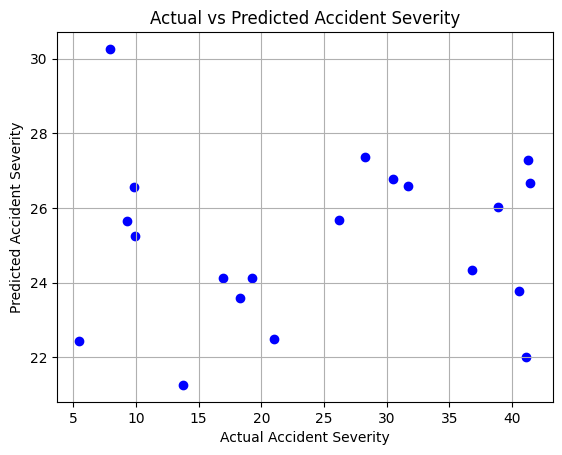

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Accident Severity")
plt.ylabel("Predicted Accident Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.grid(True)
plt.show()


The model helps identify factors affecting road accident severity.
*In developing countries, this can help governments enforce speed limits, improve visibility on roads, and plan safety campaigns based on data insights.*

In [ ]:
joblib.dump(model, 'road_accident_severity_model.pkl')


['road_accident_severity_model.pkl']

In [ ]:
from google.colab import files
files.download('road_accident_severity_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>